# Gloabal ocean biogeochemistry

@roltech
  
Roland: write your goals for this notebook
1. I want to load the dataset.
1. I want to plot all the different variables.
1. I want to produce a plot for specific regions
1. I want to reduce the repetitions of codes.
1. To understand the funtion of each syntax in this script.
1. I want to plot specific coordinate.


Roland: write notes on what is not working well
1. I'm getting a syntax error when I tried to return an output that raised more than one character to the power of string.

You can write a to-do list:
- [x] I was able to load the dataset.
- [x] I was able to plot all the the variables.
- [x] I want to plot more than one variables in a single figure.
- [x] I reduced the repetitions of codes by defining a general functions.
- [x] I want to play around with the different syntax in this script and see their functions.
- [x] I'm able to plot specific coordinate.


You can write in _italics_

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import ticker, cm

import cartopy.crs as ccrs                   # import projections
import cartopy
import gsw
# import cftime


In [2]:
%matplotlib inline
#%matplotlib qt5                         
plt.rcParams['figure.figsize'] = (5,4)
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 400
plt.close('all')

__figdir__ = '../Output/' + 'SMODE_'
savefig_args = {'bbox_inches':'tight', 'pad_inches':0.2}
Outputfiletype='png'

savefig = 1

In [3]:
data_source = r"C:\Users\rolte\Documents\GitHub\satellite_python_2022v2\Global ocean biogeochemistry hindcast\cmems_mod_glo_bgc_my_0.25_P1D-m_1641583635791.nc"

In [4]:
ds = xr.open_dataset(data_source) 

In [5]:
ds

<xarray.Dataset>
Dimensions:    (time: 1, depth: 1, latitude: 681, longitude: 1440)
Coordinates:
  * depth      (depth) float32 0.5058
  * latitude   (latitude) float32 -80.0 -79.75 -79.5 -79.25 ... 89.5 89.75 90.0
  * time       (time) datetime64[ns] 2020-12-31T12:00:00
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
Data variables:
    no3        (time, depth, latitude, longitude) float32 ...
    o2         (time, depth, latitude, longitude) float32 ...
    po4        (time, depth, latitude, longitude) float32 ...
    chl        (time, depth, latitude, longitude) float32 ...
    si         (time, depth, latitude, longitude) float32 ...
    nppv       (time, depth, latitude, longitude) float32 ...
Attributes: (12/17)
    product:                       GLOBAL_REANALYSIS_BIO_001_029
    producer:                      CMEMS - Global Monitoring and Forecasting ...
    title:                         Daily mean fields for product GLOBAL_REANA...
    area:                          GLOBAL
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...
    Conventions:                   CF-1.6
    ...                            ...
    dataset:                       global-reanalysis-bio-001-029-daily
    institution:                   Mercator Ocean
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    _CoordSysBuilder:              ucar.nc2.dataset.conv.CF1Convention
    comment:                       
    history:                       Data extracted from dataset http://localho...

In [6]:
Nitrate = ds.no3
Dissolved_Oxygen = ds.o2
Phosphate = ds.po4
Total_Chlorophyll = ds.chl
Dissolved_Silicate = ds.si
Total_Primary_Production_of_Phyto = ds.nppv


In [7]:
#Define plot dimension
Xo = 0
Yo = 0
[xmin, xmax, ymin, ymax] = [Xo-20, Xo+20, Yo-40, Yo+20]
extent = [xmin, xmax, ymin, ymax]

#Assigning a boolean value to scale
scale = True                 

In [8]:
#Define the functions
def plot_variables(longitude,latitude,variable,ax,extent,title,levels,label,scale):

    if scale is True:
        scale_type = ticker.LogLocator()            #Setting the conditions for scale types
    else:
        scale_type = ticker.MaxNLocator()
        
    cs = ax.contourf(longitude,latitude,np.squeeze(variable), levels, extend='both', transform=ccrs.PlateCarree(), locator=scale_type)
    ax.set_extent(extent, crs=ccrs.PlateCarree())
    ax.add_feature(cartopy.feature.LAND, zorder=3, facecolor=[.4,.4,.3], edgecolor='black')
    rd = plt.colorbar(cs,ax=ax, orientation='vertical', fraction = 0.03, extend='both')
    rd.set_label('Concentration (' + label+")", fontsize = 8)
    ax.set_title(title, fontsize = 8)
    
    return cs,rd,ax # function creates 3 outputs


In [9]:
#Ways of setting different levels
#levels = 10
#levels = [0,200,400]
#levels = np.arange(0,405,5)
#levels = np.linspace(0,100,20)

C:\Users\rolte\AppData\Local\Temp/ipykernel_10436/1588321480.py:12: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  rd = plt.colorbar(cs,ax=ax, orientation='vertical', fraction = 0.03, extend='both')


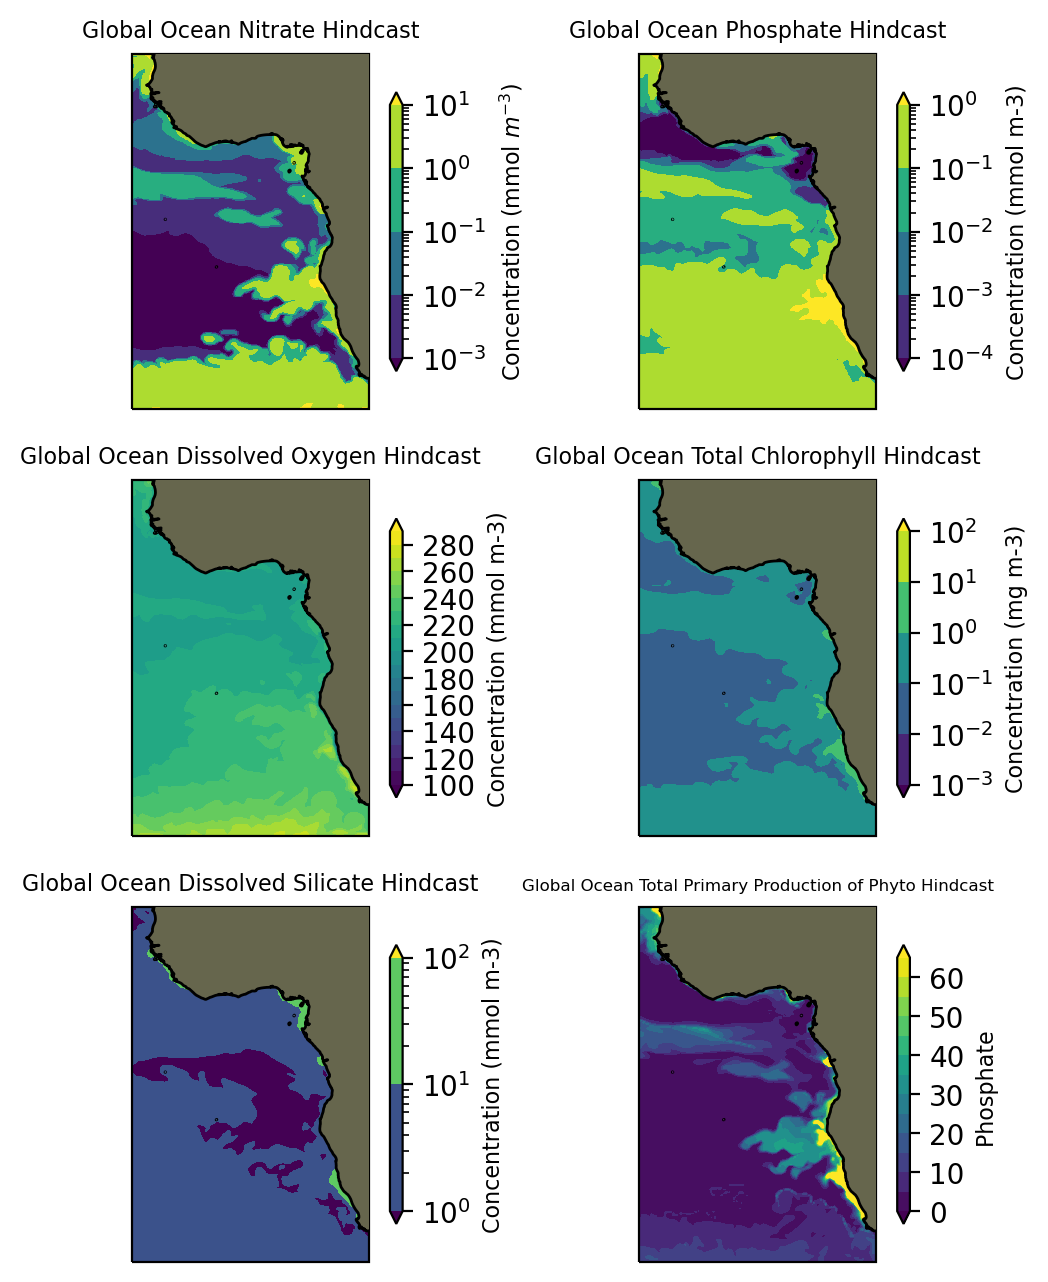

In [10]:
#Subplot line of codes
fig,axs = plt.subplots(3,2, subplot_kw = {'projection' : ccrs.PlateCarree(central_longitude=0)}, figsize = (6,8))

#Codes for square power
#$m^3$          #$m^{-3}$a
plot_variables(ds.longitude,ds.latitude,Nitrate,axs[0,0],extent, 'Global Ocean Nitrate Hindcast',10, 'mmol $m^{-3}$',True)
plot_variables(ds.longitude,ds.latitude,Phosphate,axs[0,1],extent, 'Global Ocean Phosphate Hindcast',10, 'mmol m-3',True)
levels = np.arange(100,300,10)
plot_variables(ds.longitude,ds.latitude,Dissolved_Oxygen,axs[1,0],extent, 'Global Ocean Dissolved Oxygen Hindcast',levels, 'mmol m-3',False)
plot_variables(ds.longitude,ds.latitude,Total_Chlorophyll,axs[1,1],extent, 'Global Ocean Total Chlorophyll Hindcast',10, 'mg m-3',True)
plot_variables(ds.longitude,ds.latitude,Dissolved_Silicate,axs[2,0],extent, 'Global Ocean Dissolved Silicate Hindcast',10, 'mmol m-3',True)
levels = np.arange(0,70,5)
a,b,c=plot_variables(ds.longitude,ds.latitude,Total_Primary_Production_of_Phyto,axs[2,1],extent, 'Global Ocean Total Primary Production of Phyto Hindcast',levels, 'mg m-3 day-1',False)

# asssign function outputs to named variables
#a,b,c=plot_variables(ds.longitude,ds.latitude,Dissolved_Oxygen,axs[1,0],extent, 'Global Ocean Nitrate Hindcast',10, 'mol')
#np.log10    To add a log scale to the plotted parameter
#Redefining the plot outputs
b.set_label("Phosphate ")
c.set_title('Global Ocean Total Primary Production of Phyto Hindcast', fontsize=6)

if savefig:                              
    plt.savefig(__figdir__+'CV.'+Outputfiletype,**savefig_args)   

In [11]:
c

<GeoAxesSubplot:title={'center':'Global Ocean Total Primary Production of Phyto Hindcast'}>

fig = plt.figure()
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=0))  # Orthographic


#tind=-1
#day_str = np.datetime_as_string(ds.time[tind], unit='D')
#ax.set_extent(extent, crs=ccrs.PlateCarree())
ax.set_title('Global Ocean Nitrate Hindcast')

#plt.set_cmap(cmap=plt.get_cmap('nipy_spectral'))
plt.set_cmap(cmap=plt.get_cmap('turbo'))
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.ylabels_right = False
#gl.xlocator = matplotlib.ticker.MaxNLocator(10)
#gl.xlocator = matplotlib.ticker.AutoLocator
# gl.xlocator = matplotlib.ticker.FixedLocator(np.arange(0, 360 ,30))

levels = 10
#cs = ax.contourf(ds.longitude,ds.latitude,np.squeeze(Total_Chlorophyll), levels, extend='both', transform=ccrs.PlateCarree())
rm = ax.contourf(ds.longitude,ds.latitude,np.squeeze(Nitrate), levels, extend='both', transform=ccrs.PlateCarree())
#rs = ax.contourf(ds.longitude,ds.latitude,np.squeeze(Phosphate), levels, extend='both', transform=ccrs.PlateCarree())
# cs = ax.pcolormesh(ds.longitude,ds.latitude,np.squeeze(ds.sla), vmin=levels[0], vmax=levels[-1], transform=ccrs.PlateCarree())
# cb = plt.colorbar(cs,ax=ax,shrink=.8,pad=.05)
#cb = plt.colorbar(cs,fraction = 0.022,extend='both')
rd = plt.colorbar(rm,fraction = 0.022,extend='both')
#cd = plt.colorbar(rs,fraction = 0.022,extend='both'
rd.set_label('CONC [mmol m-3]',fontsize = 10)
ax.coastlines()
ax.add_feature(cartopy.feature.LAND, zorder=3, facecolor=[.5,.5,.5], edgecolor='black')

#plot_ops_area(ax,transform=ccrs.PlateCarree(),color='w')

# 2nd way to set axes limits:
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

# Add a 10 km scale bar
#km_per_deg_lat=gsw.geostrophy.distance((125,125), (37,38))/1000
#deg_lat_equal_10km=10/km_per_deg_lat
#ax.plot(-123.75+np.asarray([0, 0]),36.75+np.asarray([0.,deg_lat_equal_10km]),transform=ccrs.PlateCarree())

if savefig:                              
    plt.savefig(__figdir__+'NO3.'+Outputfiletype,**savefig_args)               

C:\Users\rolte\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
C:\Users\rolte\AppData\Local\Temp/ipykernel_10436/1778999239.py:25: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  rd = plt.colorbar(rm,fraction = 0.022,extend='both')


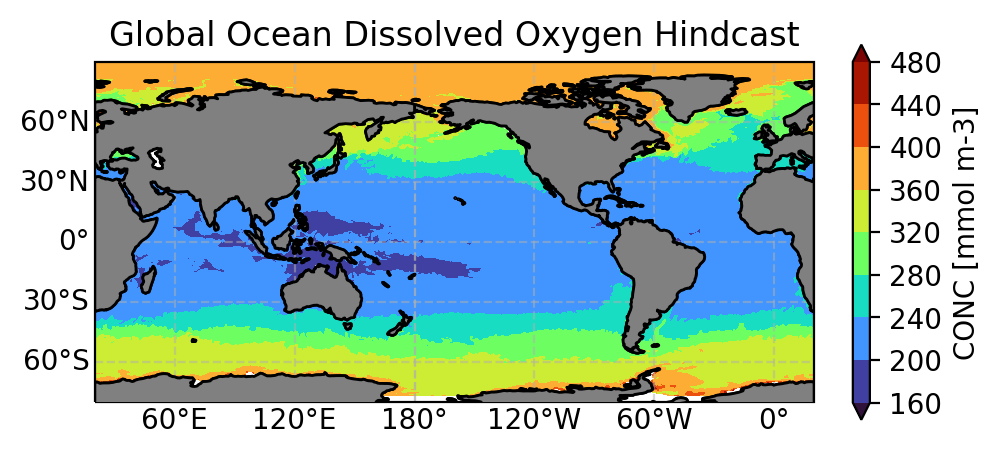

In [12]:
fig = plt.figure()
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=200))  # Orthographic
#[xmin, xmax, ymin, ymax] = [-50, 20, -50, 20]
#extent = [xmin, xmax, ymin, ymax]
#tind=-1
#day_str = np.datetime_as_string(ds.time[tind], unit='D')
#ax.set_extent(extent, crs=ccrs.PlateCarree())
ax.set_title('Global Ocean Dissolved Oxygen Hindcast')

#plt.set_cmap(cmap=plt.get_cmap('nipy_spectral'))
plt.set_cmap(cmap=plt.get_cmap('turbo'))
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.ylabels_right = False
#gl.xlocator = matplotlib.ticker.MaxNLocator(10)
#gl.xlocator = matplotlib.ticker.AutoLocator
# gl.xlocator = matplotlib.ticker.FixedLocator(np.arange(0, 360 ,30))

levels = 10
#cs = ax.contourf(ds.longitude,ds.latitude,np.squeeze(Total_Chlorophyll), levels, extend='both', transform=ccrs.PlateCarree())
rm = ax.contourf(ds.longitude,ds.latitude,np.squeeze(Dissolved_Oxygen), levels, extend='both', transform=ccrs.PlateCarree())
# cs = ax.pcolormesh(ds.longitude,ds.latitude,np.squeeze(ds.sla), vmin=levels[0], vmax=levels[-1], transform=ccrs.PlateCarree())
# cb = plt.colorbar(cs,ax=ax,shrink=.8,pad=.05)
#cb = plt.colorbar(cs,fraction = 0.022,extend='both')
rd = plt.colorbar(rm,fraction = 0.022,extend='both')
rd.set_label('CONC [mmol m-3]',fontsize = 10)
ax.coastlines()
ax.add_feature(cartopy.feature.LAND, zorder=3, facecolor=[.5,.5,.5], edgecolor='black')

#plot_ops_area(ax,transform=ccrs.PlateCarree(),color='w')

# Add a 10 km scale bar
#km_per_deg_lat=gsw.geostrophy.distance((125,125), (37,38))/1000
#deg_lat_equal_10km=10/km_per_deg_lat
#ax.plot(-123.75+np.asarray([0, 0]),36.75+np.asarray([0.,deg_lat_equal_10km]),transform=ccrs.PlateCarree())

if savefig:                              
    plt.savefig(__figdir__+'O2.'+Outputfiletype,**savefig_args)               

C:\Users\rolte\AppData\Local\Temp/ipykernel_10436/1850702098.py:25: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  rd = plt.colorbar(rm,fraction = 0.022,extend='both')


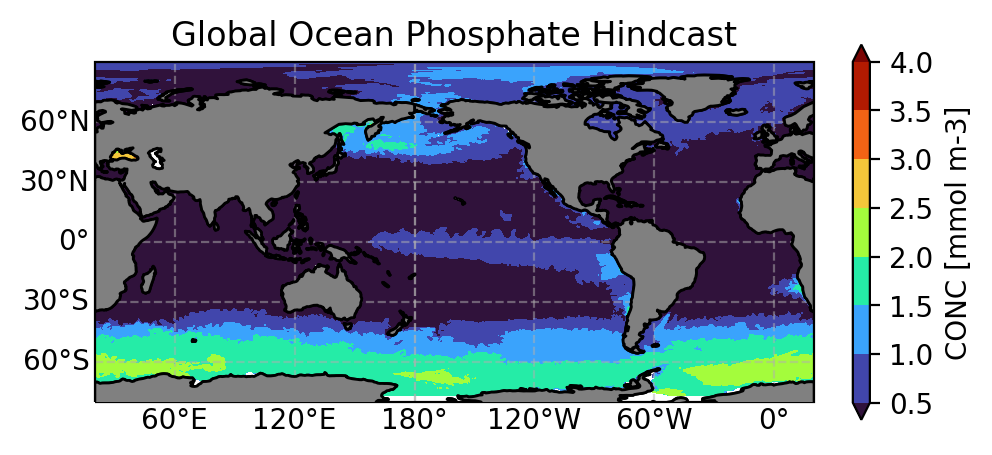

In [13]:
fig = plt.figure()
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=200))  # Orthographic
#[xmin, xmax, ymin, ymax] = [-50, 20, -50, 20]
#extent = [xmin, xmax, ymin, ymax]
#tind=-1
#day_str = np.datetime_as_string(ds.time[tind], unit='D')
#ax.set_extent(extent, crs=ccrs.PlateCarree())
ax.set_title('Global Ocean Phosphate Hindcast')

#plt.set_cmap(cmap=plt.get_cmap('nipy_spectral'))
plt.set_cmap(cmap=plt.get_cmap('turbo'))
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.ylabels_right = False
#gl.xlocator = matplotlib.ticker.MaxNLocator(10)
#gl.xlocator = matplotlib.ticker.AutoLocator
# gl.xlocator = matplotlib.ticker.FixedLocator(np.arange(0, 360 ,30))

levels = 10
#cs = ax.contourf(ds.longitude,ds.latitude,np.squeeze(Total_Chlorophyll), levels, extend='both', transform=ccrs.PlateCarree())
rm = ax.contourf(ds.longitude,ds.latitude,np.squeeze(Phosphate), levels, extend='both', transform=ccrs.PlateCarree())
# cs = ax.pcolormesh(ds.longitude,ds.latitude,np.squeeze(ds.sla), vmin=levels[0], vmax=levels[-1], transform=ccrs.PlateCarree())
# cb = plt.colorbar(cs,ax=ax,shrink=.8,pad=.05)
#cb = plt.colorbar(cs,fraction = 0.022,extend='both')
rd = plt.colorbar(rm,fraction = 0.022,extend='both')
rd.set_label('CONC [mmol m-3]',fontsize = 10)
ax.coastlines()
ax.add_feature(cartopy.feature.LAND, zorder=3, facecolor=[.5,.5,.5], edgecolor='black')

#plot_ops_area(ax,transform=ccrs.PlateCarree(),color='w')

# Add a 10 km scale bar
#km_per_deg_lat=gsw.geostrophy.distance((125,125), (37,38))/1000
#deg_lat_equal_10km=10/km_per_deg_lat
#ax.plot(-123.75+np.asarray([0, 0]),36.75+np.asarray([0.,deg_lat_equal_10km]),transform=ccrs.PlateCarree())

if savefig:                              
    plt.savefig(__figdir__+'PO4.'+Outputfiletype,**savefig_args)               

C:\Users\rolte\AppData\Local\Temp/ipykernel_10436/1962166233.py:25: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  rd = plt.colorbar(rm,fraction = 0.022,extend='both')


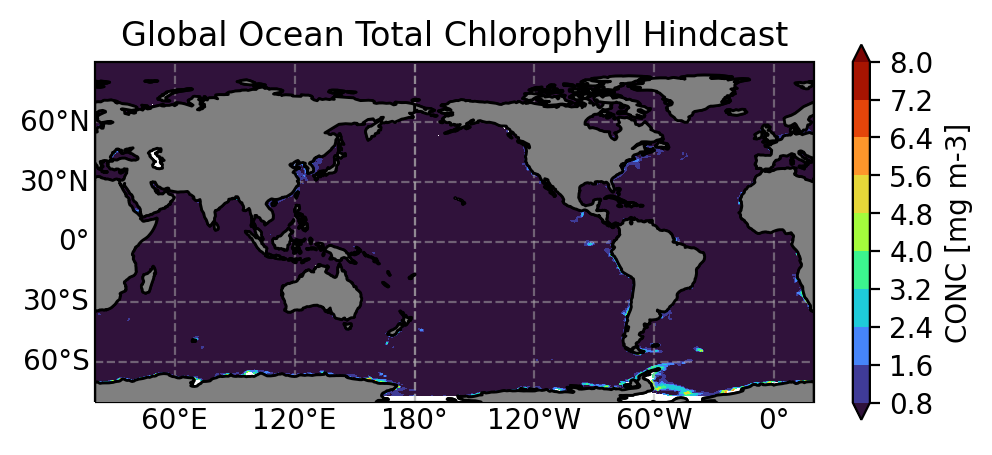

In [14]:
fig = plt.figure()
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=200))  # Orthographic
#[xmin, xmax, ymin, ymax] = [-50, 20, -50, 20]
#extent = [xmin, xmax, ymin, ymax]
#tind=-1
#day_str = np.datetime_as_string(ds.time[tind], unit='D')
#ax.set_extent(extent, crs=ccrs.PlateCarree())
ax.set_title('Global Ocean Total Chlorophyll Hindcast')

#plt.set_cmap(cmap=plt.get_cmap('nipy_spectral'))
plt.set_cmap(cmap=plt.get_cmap('turbo'))
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.ylabels_right = False
#gl.xlocator = matplotlib.ticker.MaxNLocator(10)
#gl.xlocator = matplotlib.ticker.AutoLocator
# gl.xlocator = matplotlib.ticker.FixedLocator(np.arange(0, 360 ,30))

levels = 10
#cs = ax.contourf(ds.longitude,ds.latitude,np.squeeze(Total_Chlorophyll), levels, extend='both', transform=ccrs.PlateCarree())
rm = ax.contourf(ds.longitude,ds.latitude,np.squeeze(Total_Chlorophyll), levels, extend='both', transform=ccrs.PlateCarree())
# cs = ax.pcolormesh(ds.longitude,ds.latitude,np.squeeze(ds.sla), vmin=levels[0], vmax=levels[-1], transform=ccrs.PlateCarree())
# cb = plt.colorbar(cs,ax=ax,shrink=.8,pad=.05)
#cb = plt.colorbar(cs,fraction = 0.022,extend='both')
rd = plt.colorbar(rm,fraction = 0.022,extend='both')
rd.set_label('CONC [mg m-3]',fontsize = 10)
ax.coastlines()
ax.add_feature(cartopy.feature.LAND, zorder=3, facecolor=[.5,.5,.5], edgecolor='black')

#plot_ops_area(ax,transform=ccrs.PlateCarree(),color='w')

# Add a 10 km scale bar
#km_per_deg_lat=gsw.geostrophy.distance((125,125), (37,38))/1000
#deg_lat_equal_10km=10/km_per_deg_lat
#ax.plot(-123.75+np.asarray([0, 0]),36.75+np.asarray([0.,deg_lat_equal_10km]),transform=ccrs.PlateCarree())

if savefig:                              
    plt.savefig(__figdir__+'CHL.'+Outputfiletype,**savefig_args)               

C:\Users\rolte\AppData\Local\Temp/ipykernel_10436/1076160640.py:25: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  rd = plt.colorbar(rm,fraction = 0.022,extend='both')


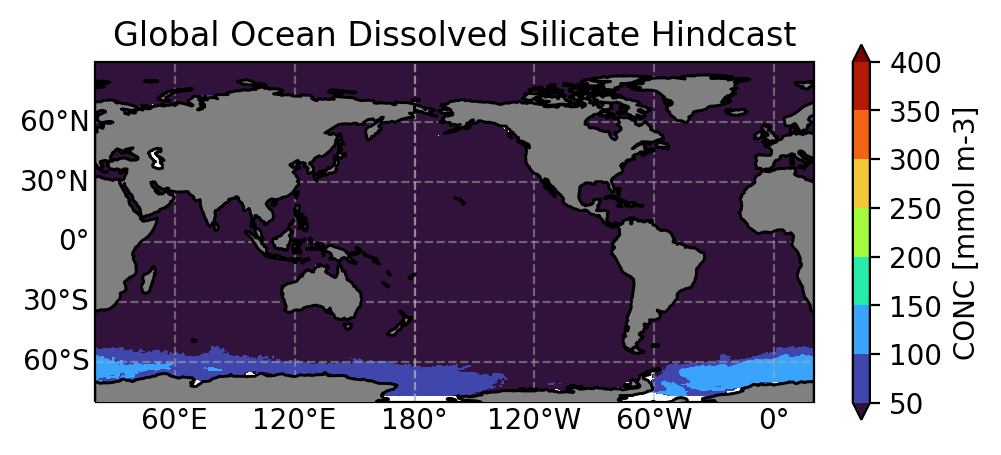

In [15]:
fig = plt.figure()
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=200))  # Orthographic
#[xmin, xmax, ymin, ymax] = [-50, 20, -50, 20]
#extent = [xmin, xmax, ymin, ymax]
#tind=-1
#day_str = np.datetime_as_string(ds.time[tind], unit='D')
#ax.set_extent(extent, crs=ccrs.PlateCarree())
ax.set_title('Global Ocean Dissolved Silicate Hindcast')

#plt.set_cmap(cmap=plt.get_cmap('nipy_spectral'))
plt.set_cmap(cmap=plt.get_cmap('turbo'))
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.ylabels_right = False
#gl.xlocator = matplotlib.ticker.MaxNLocator(10)
#gl.xlocator = matplotlib.ticker.AutoLocator
# gl.xlocator = matplotlib.ticker.FixedLocator(np.arange(0, 360 ,30))

levels = 10
#cs = ax.contourf(ds.longitude,ds.latitude,np.squeeze(Total_Chlorophyll), levels, extend='both', transform=ccrs.PlateCarree())
rm = ax.contourf(ds.longitude,ds.latitude,np.squeeze(Dissolved_Silicate), levels, extend='both', transform=ccrs.PlateCarree())
# cs = ax.pcolormesh(ds.longitude,ds.latitude,np.squeeze(ds.sla), vmin=levels[0], vmax=levels[-1], transform=ccrs.PlateCarree())
# cb = plt.colorbar(cs,ax=ax,shrink=.8,pad=.05)
#cb = plt.colorbar(cs,fraction = 0.022,extend='both')
rd = plt.colorbar(rm,fraction = 0.022,extend='both')
rd.set_label('CONC [mmol m-3]',fontsize = 10)
ax.coastlines()
ax.add_feature(cartopy.feature.LAND, zorder=3, facecolor=[.5,.5,.5], edgecolor='black')

#plot_ops_area(ax,transform=ccrs.PlateCarree(),color='w')

# Add a 10 km scale bar
#km_per_deg_lat=gsw.geostrophy.distance((125,125), (37,38))/1000
#deg_lat_equal_10km=10/km_per_deg_lat
#ax.plot(-123.75+np.asarray([0, 0]),36.75+np.asarray([0.,deg_lat_equal_10km]),transform=ccrs.PlateCarree())

if savefig:                              
    plt.savefig(__figdir__+'SI.'+Outputfiletype,**savefig_args)               

C:\Users\rolte\AppData\Local\Temp/ipykernel_10436/1754600163.py:25: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  rd = plt.colorbar(rm,fraction = 0.022,extend='both')


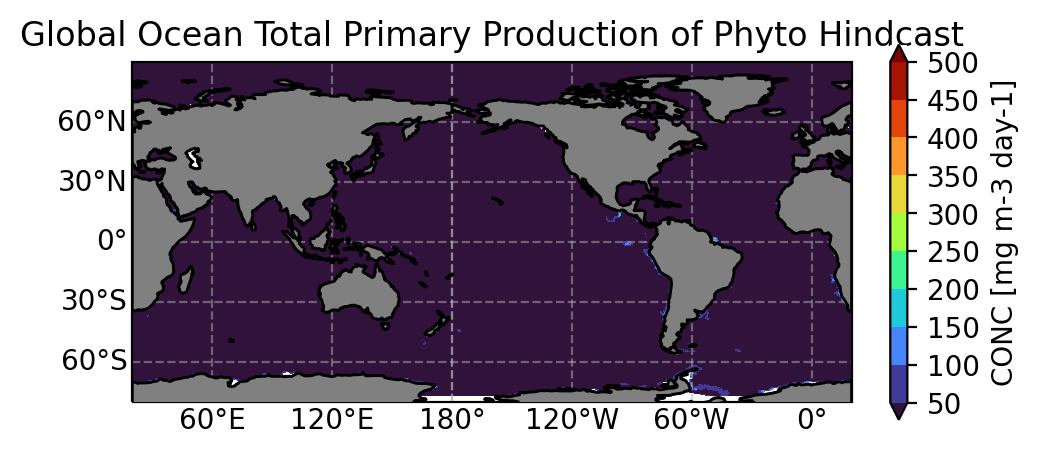

In [16]:
fig = plt.figure()
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=200))  # Orthographic
#[xmin, xmax, ymin, ymax] = [-50, 20, -50, 20]
#extent = [xmin, xmax, ymin, ymax]
#tind=-1
#day_str = np.datetime_as_string(ds.time[tind], unit='D')
#ax.set_extent(extent, crs=ccrs.PlateCarree())
ax.set_title('Global Ocean Total Primary Production of Phyto Hindcast')

#plt.set_cmap(cmap=plt.get_cmap('nipy_spectral'))
plt.set_cmap(cmap=plt.get_cmap('turbo'))
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.ylabels_right = False
#gl.xlocator = matplotlib.ticker.MaxNLocator(10)
#gl.xlocator = matplotlib.ticker.AutoLocator
# gl.xlocator = matplotlib.ticker.FixedLocator(np.arange(0, 360 ,30))

levels = 10
#cs = ax.contourf(ds.longitude,ds.latitude,np.squeeze(Total_Chlorophyll), levels, extend='both', transform=ccrs.PlateCarree())
rm = ax.contourf(ds.longitude,ds.latitude,np.squeeze(Total_Primary_Production_of_Phyto), levels, extend='both', transform=ccrs.PlateCarree())
# cs = ax.pcolormesh(ds.longitude,ds.latitude,np.squeeze(ds.sla), vmin=levels[0], vmax=levels[-1], transform=ccrs.PlateCarree())
# cb = plt.colorbar(cs,ax=ax,shrink=.8,pad=.05)
#cb = plt.colorbar(cs,fraction = 0.022,extend='both')
rd = plt.colorbar(rm,fraction = 0.022,extend='both')
rd.set_label('CONC [mg m-3 day-1]',fontsize = 10)
ax.coastlines()
ax.add_feature(cartopy.feature.LAND, zorder=3, facecolor=[.5,.5,.5], edgecolor='black')

#plot_ops_area(ax,transform=ccrs.PlateCarree(),color='w')

# Add a 10 km scale bar
#km_per_deg_lat=gsw.geostrophy.distance((125,125), (37,38))/1000
#deg_lat_equal_10km=10/km_per_deg_lat
#ax.plot(-123.75+np.asarray([0, 0]),36.75+np.asarray([0.,deg_lat_equal_10km]),transform=ccrs.PlateCarree())

#if savefig:                              
 #   plt.savefig(__figdir__+'NPPV.'+Outputfiletype,**savefig_args)               

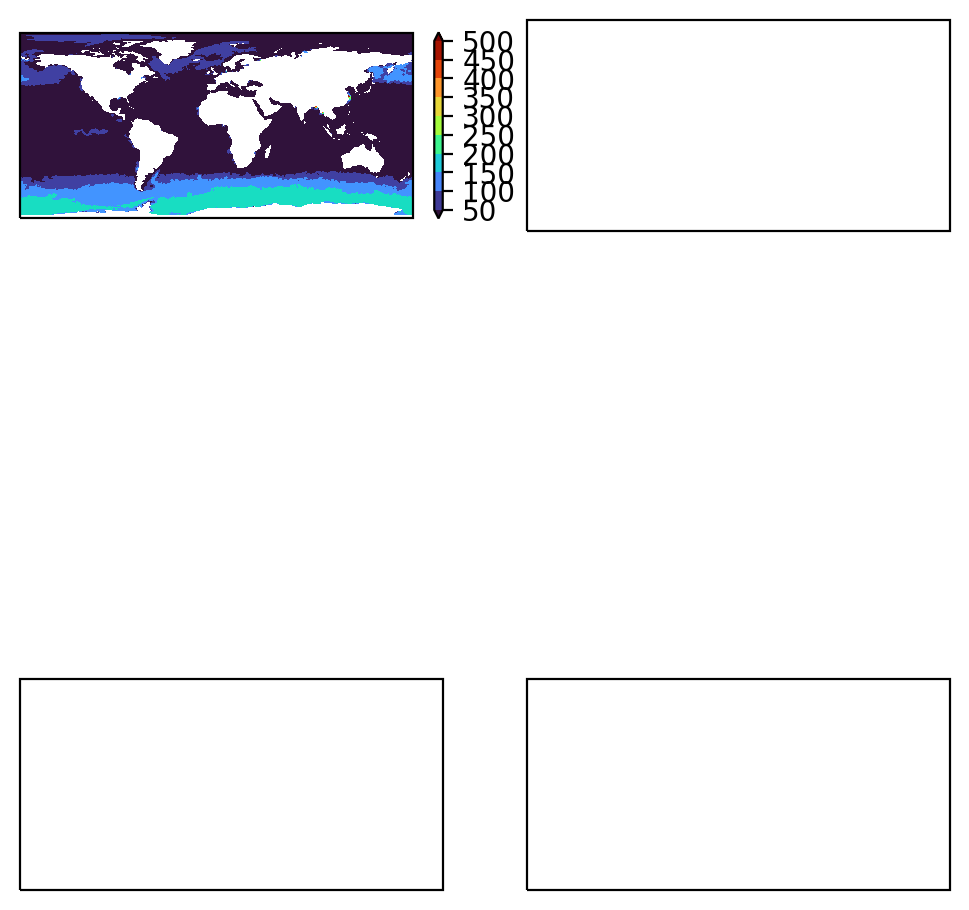

In [17]:
fig,axs = plt.subplots(2,2, subplot_kw = {'projection' : ccrs.PlateCarree(central_longitude=0)}, figsize = (6,8))
axs[0,0].contourf(ds.longitude,ds.latitude,np.squeeze(Nitrate), levels, extend='both', transform=ccrs.PlateCarree())
plt.colorbar(rm, ax=axs[0,0],fraction = 0.02)